# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
from numpy.random import RandomState

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

state = np.random.RandomState(12345)

In [2]:
data_1 = pd.read_csv('/datasets/geo_data_0.csv')
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
data_3 = pd.read_csv('/datasets/geo_data_2.csv')

**Регион 1**

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


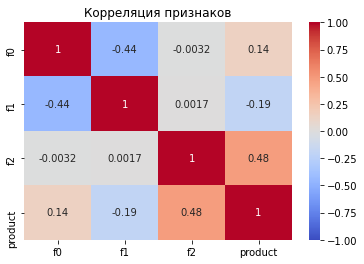

In [3]:
display(data_1.head())
print()
data_1.info()
display(data_1.describe())
sns.heatmap(data_1.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция признаков')
plt.show()

**Регион 2**

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


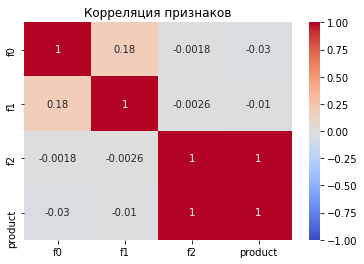

In [4]:
display(data_2.head())
print()
data_2.info()
display(data_2.describe())
sns.heatmap(data_2.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция признаков')
plt.show()

**Регион 3**

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


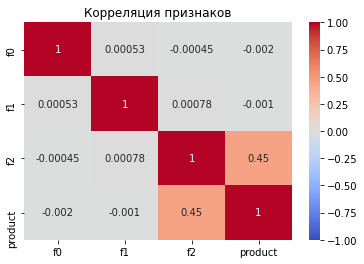

In [5]:
display(data_3.head())
print()
data_3.info()
display(data_3.describe())
sns.heatmap(data_3.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция признаков')
plt.show()

In [6]:
#проверка на дубликаты
print(data_1.duplicated().sum())
print(data_2.duplicated().sum())
print(data_2.duplicated().sum())

0
0
0


В каждом датасете 100000 записей, пропусков и полных дубликатов нет.

Средний запас сырья во 2 регионе заметно ниже, чем в 1 и 3: 68 тыс. против 92 тыс. и 95 тыс. бар. соответственно.

Во всех регионах целевой признак сильнее всего корреллирует с параметром f2 - с увеличением параметра увеличиваемся и объем сырья. Наиболее заметно это в данных по 2 региону. В 1 регионе также можно заметить незначительную корреляцию с f0, f1.

## Обучение и проверка модели

Разделим выборки на обущающую и валидационную в соотношении 75:25 и обучим модель линейной регрессии.

In [7]:
def split_train(data):
    features = data.drop(['id','product'], axis=1) #сразу удалим столбец id, тк для обучения модели он не понадобится
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                                  test_size=.25, random_state=state)
    display(pd.DataFrame({
        'Выборка': ['Обучающая','Валидационная'],
        'Признаки': [features_train.shape, features_valid.shape],
        'Целевой признак': [target_train.shape, target_valid.shape]
    }))
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = pd.Series(model.predict(features_valid), index=target_valid.index)
    rmse = mean_squared_error(target_valid, predicted_valid)**0.5
    mean_product = predicted_valid.mean()
    print('Средний запас предсказанного сырья - {:.1f} тыс. бар.'.format(mean_product))
    print()
    print('RMSE - {:.1f} тыс. бар.'.format(rmse))
    return predicted_valid, target

**Регион 1**

In [8]:
predicted_valid_1, target_1 = split_train(data_1)

,Выборка,Признаки,Целевой признак
0,Обучающая,"(75000, 3)","(75000,)"
1,Валидационная,"(25000, 3)","(25000,)"


Средний запас предсказанного сырья - 92.6 тыс. бар.

RMSE - 37.6 тыс. бар.


**Регион 2**

In [9]:
predicted_valid_2, target_2 = split_train(data_2)

,Выборка,Признаки,Целевой признак
0,Обучающая,"(75000, 3)","(75000,)"
1,Валидационная,"(25000, 3)","(25000,)"


Средний запас предсказанного сырья - 68.8 тыс. бар.

RMSE - 0.9 тыс. бар.


**Регион 3**

In [10]:
predicted_valid_3, target_3 = split_train(data_3)

,Выборка,Признаки,Целевой признак
0,Обучающая,"(75000, 3)","(75000,)"
1,Валидационная,"(25000, 3)","(25000,)"


Средний запас предсказанного сырья - 95.1 тыс. бар.

RMSE - 40.0 тыс. бар.


Самый большой средний объем сырья модель предсказала для 3 региона - 95,1 тыс. бар. против 92,6 тыс. в 1 регионе и 68,8 во 2 регионе.

Наименьший показатель RMSE у 2 региона - 0,9 (видимо, влияет высокая корреляция с f2), в 1 и 3 регионах размер ошибки значительно больше - 37,6 и 40 соответственно.

## Расчёт прибыли и рисков 
### Подготовка к расчету прибыли

Сохраним в отдельных переменных все ключевые значения для расчетов:

In [11]:
budget = 10**10 #бюджет на разработку скважин в регионе
income_per_bar = 450000 #доход с единицы продукта
points_500 = 500 #точки для разведки
points_200 = 200 #точки для разработки

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.

In [12]:
budget/points_200/income_per_bar

111.11111111111111

Минимальный объем сырья в скажине для безубыточной разработки составляет 111,11 тыс. бар. Средние значения объема сырья в 1 и 3 регионах близки к минимальному запасу, показатели по 2 региону значительно ниже, чем необходимо.

### Расчет прибыли 

Выберем скважины с максимальными значениями предсказаний, просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям и рассчитаем прибыль для полученного объёма сырья.

In [13]:
def profit(target, predictions, points):
    predict_sorted = predictions.sort_values(ascending=False)
    top = target[predict_sorted.index][:points]
    income = top.sum() * income_per_bar - budget
    return income

In [14]:
print('Прибыль региона 1 - {:.3f} млрд. руб.'.format(profit(target_1, predicted_valid_1, points_200)/10**9))
print('Прибыль региона 2 - {:.3f} млрд. руб.'.format(profit(target_2, predicted_valid_2, points_200)/10**9))
print('Прибыль региона 3 - {:.3f} млрд. руб.'.format(profit(target_3, predicted_valid_3, points_200)/10**9))

Прибыль региона 1 - 3.321 млрд. руб.
Прибыль региона 2 - 2.415 млрд. руб.
Прибыль региона 3 - 2.540 млрд. руб.


### Расчет прибыли и рисков
Применим технику Bootstrap с 1000 выборок, найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков.

In [15]:
def bootstrap(predicted, fact):
    values = []
    for i in range(1000):
        top_200_predict = predicted.sample(n=500, random_state=state).sort_values(ascending=False).head(200)
        top_200_fact = fact[top_200_predict.index]
        profit = top_200_fact.sum() * income_per_bar - budget
        values.append(profit)
    values = pd.Series(values)
    lower = values.quantile(q=0.025)
    upper = values.quantile(q=0.975)
    region_mean = values.mean()
    risk = (values < 0).mean()
    print('Средняя прибыль региона составляет {:.2f} руб.'.format(region_mean))
    print('95% доверительный интервал: {:.2f} - {:.2f} руб.'.format(lower, upper))
    print('Риск убытков - {:.1%}'.format(risk))
    return values

**Регион 1**

In [16]:
values_1 = bootstrap(predicted_valid_1, target_1)

Средняя прибыль региона составляет 386002073.60 руб.
95% доверительный интервал: -106853725.77 - 880368421.17 руб.
Риск убытков - 6.5%


**Регион 2**

In [17]:
values_2 = bootstrap(predicted_valid_2, target_2)

Средняя прибыль региона составляет 446085233.10 руб.
95% доверительный интервал: 83844725.21 - 848796933.23 руб.
Риск убытков - 0.7%


**Регион 3**

In [18]:
values_3 = bootstrap(predicted_valid_3, target_3)

Средняя прибыль региона составляет 337674883.21 руб.
95% доверительный интервал: -194117198.45 - 862135933.84 руб.
Риск убытков - 10.0%


Наиболее подходящий регион для разработки скважин - 2: наибольшая средняя прибыль, низкий риск убытков и доверительный интервал в положительных границах. Более того в регионах 1 и 3 риск убытков превышает допустимый порог.

## Вывод

При выборе локации для разработки нефтяных сважин с наибольшей прибылью и наименьшими рисками были изучены данные о запасах сырья в трех регионах и построена модель линейной регрессии по каждому из них. 

На основании предсказаний модели техникой bootstrap были рассчитаны 95% доверительный интервал и риск убытков для 200 сважин с максимальным объемом сырья в каждом регионе.

Исходя из лучшего показателя RMSE, наибольшей средней прибыли, низкого риска убытком и положительного доверительного интревала, для разработки скважин рекомендуется регион 2.